<h1 align="left">Mask to Text Experimentation</h1>

<p align="left"><i>PASTIS24 Dataset</i></p>

<p align="left">
  ITESM
  
  <a href="https://www.linkedin.com/in/juanrtato/">Juan Ricardo Albarracin B.</a>
  <br>
  <a href="">Luis Ángel Oporto Añacato.</a>
  <br>
  <a href="">David Alexis García Espinosa.</a>
  <br>
  <b>Last updated:</b> <i>05/05/2025</i>
  <br><br>
  <a target="_blank">
    <img src="https://github.com/QData/TextAttack/workflows/Github%20PyTest/badge.svg" alt="Testing">
  </a>
  <a href="https://img.shields.io/badge/version-0.1.0-blue.svg?cacheSeconds=2592000">
    <img src="https://img.shields.io/badge/version-0.1.0-blue.svg?cacheSeconds=2592000" alt="Version" height="18">
  </a>
</p><br>

In [1]:
import ast
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap

In [2]:
with open("../datalake/ground_truth_examples.json", "r") as json_file:
    data = json.load(json_file)
mask_arrays = [np.array(arr) for arr in data]
len(mask_arrays)

24

In [3]:
mask_arrays[15].shape

(24, 24)

In [4]:
with open("../datalake/label_names_es.json", "r") as json_file:
    label_names = json.load(json_file)
label_names

{'0': 'Fondo',
 '1': 'Pradera',
 '2': 'Trigo blando de invierno',
 '3': 'Maíz',
 '4': 'Cebada de invierno',
 '5': 'Colza de invierno',
 '6': 'Cebada de primavera',
 '7': 'Girasol',
 '8': 'Vid',
 '9': 'Remolacha',
 '10': 'Triticale de invierno',
 '11': 'Trigo duro de invierno',
 '12': 'Frutas, verduras, flores',
 '13': 'Papas',
 '14': 'Forraje leguminoso',
 '15': 'Soja',
 '16': 'Huerto',
 '17': 'Cereal mixto',
 '18': 'Sorgo',
 '19': 'Etiqueta vacía'}

In [5]:
with open("../datalake/label_names_en.json", "r") as json_file:
    label_names_en = json.load(json_file)
label_names_en

{'0': 'Background',
 '1': 'Meadow',
 '2': 'Soft winter wheat',
 '3': 'Corn',
 '4': 'Winter barley',
 '5': 'Winter rapeseed',
 '6': 'Spring barley',
 '7': 'Sunflower',
 '8': 'Grapevine',
 '9': 'Beet',
 '10': 'Winter triticale',
 '11': 'Winter durum wheat',
 '12': 'Fruits,  vegetables, flowers',
 '13': 'Potatoes',
 '14': 'Leguminous fodder',
 '15': 'Soybeans',
 '16': 'Orchard',
 '17': 'Mixed cereal',
 '18': 'Sorghum',
 '19': 'Void label'}

In [6]:
with open("../datalake/colormap.txt", "r") as txt_file:
    colormap = txt_file.readlines()
colormap = [ast.literal_eval(line.strip().rstrip(',')) for line in colormap]

In [7]:
colormap

[(0, 0, 0),
 (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (1.0, 0.7333333333333333, 0.47058823529411764),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (1.0, 0.596078431372549, 0.5882352941176471),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.9686274509803922, 0.7137254901960784, 0.8235294117647058),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7803921568627451, 0.7803921568627451, 0.7803921568627451),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.8588235294117647

In [8]:
from matplotlib.patches import Patch


def plot_seg_mask(mask, colormap, class_labels=None):
    """
    Plots a 2D mask using a colormap defined as a list of RGB tuples.

    Args:
        mask (np.ndarray): 2D mask with integer labels as class indices.
        colormap (str): Text containing RGB tuples (values from 0 to 1), one per line.
    """

    cmap = ListedColormap(colormap)
    plt.figure(figsize=(6, 6))
    plt.imshow(mask, cmap=cmap, interpolation='nearest')
    plt.axis('off')
    plt.title("Mask with Custom Colormap")
    unique_classes = np.unique(mask)
    handles = []
    for cls in unique_classes:
        if cls < len(colormap):  # avoid out-of-range
            color = colormap[cls]
            label = f"Class {cls}" if class_labels is None else class_labels[cls]
            handles.append(Patch(color=color, label=label))

    plt.legend(handles=handles, loc='upper right', bbox_to_anchor=(1.2, 1.0))
    plt.show()

In [9]:
def plot_seg_mask(mask, colormap, class_labels=None):
    """
    Function to plot a segmentation mask with a custom colormap.

    Args:
        mask (np.ndarray): 2D mask with integer labels as class indices.
        colormap (str): Text containing RGB tuples (values from 0 to 1), one per line.
        class_labels (list, optional): List of class labels for the legend. Defaults to None.
    """
    fig, ax = plt.subplots(figsize=(8, 8))
    cax = ax.imshow(mask, cmap=colormap, interpolation='none')
    if class_labels is not None:
        handles = []
        for i, label in enumerate(class_labels):
            handles.append(plt.Line2D([0], [0], marker='s', color='w', label=label, 
                                      markersize=10, markerfacecolor=colormap[i]))
        ax.legend(handles=handles, loc='upper right')

    plt.colorbar(cax, ax=ax, shrink=0.8)
    plt.show()

In [10]:
print(np.unique(mask_arrays[15]))

[ 0.  1.  3. 13.]


In [11]:
label_names

{'0': 'Fondo',
 '1': 'Pradera',
 '2': 'Trigo blando de invierno',
 '3': 'Maíz',
 '4': 'Cebada de invierno',
 '5': 'Colza de invierno',
 '6': 'Cebada de primavera',
 '7': 'Girasol',
 '8': 'Vid',
 '9': 'Remolacha',
 '10': 'Triticale de invierno',
 '11': 'Trigo duro de invierno',
 '12': 'Frutas, verduras, flores',
 '13': 'Papas',
 '14': 'Forraje leguminoso',
 '15': 'Soja',
 '16': 'Huerto',
 '17': 'Cereal mixto',
 '18': 'Sorgo',
 '19': 'Etiqueta vacía'}

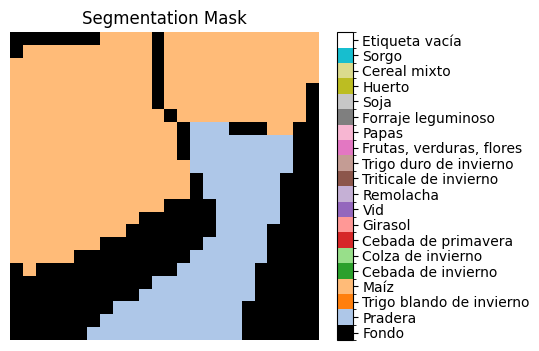

In [12]:
def plot_seg_mask(mask_array, colormap, class_labels=None):
    """
    Plots a segmentation mask with a custom colormap.
    
    Args:
        mask_array (np.ndarray): 2D array representing the segmentation mask.
        colormap (list): List of RGB tuples for the colormap.
        class_labels (dict, optional): Dictionary mapping class indices to labels.
    
    """
    custom_cmap = mcolors.ListedColormap(colormap)
    bounds = np.arange(len(colormap) + 1) - 0.5
    norm = mcolors.BoundaryNorm(bounds, custom_cmap.N)
    fig, ax = plt.subplots(figsize=(5, 4))
    cax = ax.imshow(mask_array, cmap=custom_cmap, norm=norm)
    cbar = fig.colorbar(cax, ax=ax, ticks=np.arange(len(colormap)))
    cbar.set_ticks(np.arange(len(colormap)))
    cbar.set_ticklabels(list(class_labels.values()))
    ax.set_title("Segmentation Mask")
    ax.axis('off')  
    plt.show()

plot_seg_mask(mask_arrays[4], colormap, class_labels=label_names)


In [13]:
def get_area_per_class(seg_mask: np.array, label_names: dict, area_px_m2: int = 100) -> dict:
    """
    Get the area (in m2) of each class in the segmentation mask.
    Args:
        seg_mask (np.ndarray): Segmentation mask with class labels.
        classes (dict): Dictionary mapping class labels to their respective names.
        area_px_m2 (float): Area of one pixel in square meters.
        label_names (dict): Dictionary mapping class indices to labels.
    
    Returns:
        dict: Dictionary with class labels as keys and their respective areas in square meters.
    """
    classes, counts = np.unique(seg_mask, return_counts=True)
    if label_names is not None:
        areas_per_class = {
            label_names.get(str(int(crop_class))): int(count * area_px_m2)
            for crop_class, count in zip(classes, counts)
        }
        return areas_per_class

    return {
            str(int(crop_class)): int(count * area_px_m2)
            for crop_class, count in zip(classes, counts)
        }

In [14]:
for i in range(len(mask_arrays)):
    print(get_area_per_class(mask_arrays[i], label_names))

{'Fondo': 14900, 'Pradera': 29700, 'Cebada de invierno': 12500, 'Etiqueta vacía': 500}
{'Fondo': 14300, 'Vid': 42900, 'Etiqueta vacía': 400}
{'Fondo': 23200, 'Trigo blando de invierno': 24700, 'Vid': 9700}
{'Fondo': 29900, 'Pradera': 27700}
{'Fondo': 17900, 'Pradera': 12000, 'Maíz': 27700}
{'Fondo': 47700, 'Pradera': 9900}
{'Fondo': 17400, 'Pradera': 33200, 'Colza de invierno': 1200, 'Etiqueta vacía': 5800}
{'Fondo': 20900, 'Pradera': 10900, 'Girasol': 900, 'Vid': 14200, 'Frutas, verduras, flores': 8800, 'Etiqueta vacía': 1900}
{'Fondo': 57600}
{'Fondo': 13300, 'Pradera': 44300}
{'Fondo': 8400, 'Maíz': 37300, 'Etiqueta vacía': 11900}
{'Fondo': 25400, 'Pradera': 20300, 'Cebada de invierno': 11300, 'Etiqueta vacía': 600}
{'Fondo': 2400, 'Pradera': 54700, 'Etiqueta vacía': 500}
{'Fondo': 20800, 'Vid': 33200, 'Etiqueta vacía': 3600}
{'Cebada de invierno': 10900, 'Etiqueta vacía': 46700}
{'Fondo': 900, 'Pradera': 20800, 'Maíz': 24800, 'Papas': 11100}
{'Fondo': 26600, 'Trigo blando de invier

In [15]:
get_area_per_class(mask_arrays[15], label_names)

{'Fondo': 900, 'Pradera': 20800, 'Maíz': 24800, 'Papas': 11100}

In [16]:
get_area_per_class(mask_arrays[3], label_names)

{'Fondo': 29900, 'Pradera': 27700}

In [17]:
INITIAL_MSGS_ES = [
    "En la imagen se puede observar presencia de cultivo de ",
    "Se observa en la imagen el cultivo de ",
    "En esta zona se ha identificado cultivo de ",
    "La imagen muestra un área cultivada de ",
    "En la imagen se puede identificar un cultivo de ",
    "Se puede apreciar el cultivo de ",
    "En la imagen se destaca el cultivo de ",
    "En este terreno se observa el cultivo de ",
    "En la imagen se visualiza el cultivo de ",
    "Se observa una área cultivada con ",
    "La imagen refleja el cultivo de ",
    "En la imagen, el área cultivada corresponde a ",
    "El cultivo de aparece en la imagen es de ",
    "En la imagen se representa una zona cultivada de ",
    "Se aprecia en la imagen un cultivo de "
]

END_MSGS_ES = [
    "lo que constituye una fracción considerable de la superficie agrícola total: ",
    "lo que representa un porcentaje importante de la superficie agrícola total: ",
    "lo que equivale a una porción significativa de la tierra cultivada en la región: ",
    "lo que corresponde a una parte relevante de la superficie cultivada en la zona: ",
    "lo que representa una porción destacada de la superficie agrícola de la región: ",
    "lo que abarca una fracción destacada de la superficie cultivable total: ",
    "lo que constituye una porción importante de la superficie agrícola de la zona: ",
    "lo que corresponde a una fracción considerable de la superficie agrícola disponible: ",
    "lo que constituye una parte esencial de la superficie agrícola total: ",
    "lo que representa una porción significativa de la tierra cultivada total: "
]

NO_CROP_MSGS_ES = [
    "No se detectó cultivo en la imagen.",
    "En la imagen no se identificaron cultivos.",
    "No se observa presencia de cultivo en esta zona.",
    "La imagen no muestra ningún tipo de cultivo.",
    "No se encontró evidencia de cultivo en la imagen.",
    "En esta área no se detectaron terrenos cultivados.",
    "La imagen corresponde a una zona sin cultivos detectados.",
    "No hay cultivos visibles en la imagen analizada.",
    "La imagen no presenta señales de actividad agrícola.",
    "No se registra presencia de cultivo en esta región."
]

EXTENTION_MSGS_ES = [
    "con una extensión aproximada de",
    "que cubre un área cercana a",
    "con un tamaño estimado de",
    "ocupando alrededor de",
    "que se extiende por aproximadamente",
    "con una superficie estimada en",
    "abarcando cerca de",
    "con una cobertura de aproximadamente",
    "que representa un área de alrededor de",
    "con una dimensión próxima a"
]

INITIAL_MSGS_EN = [
    "The image shows the presence of ",
    "The image displays the crop of ",
    "This area has been identified with the crop of ",
    "The image shows a cultivated area of ",
    "A crop of can be identified in the image ",
    "The crop of can be seen in the image ",
    "The image highlights the crop of ",
    "This land shows the presence of the crop of ",
    "The crop of is visible in the image ",
    "A cultivated area with can be observed ",
    "The image reflects the crop of ",
    "In the image, the cultivated area corresponds to ",
    "The crop appearing in the image is ",
    "The image represents a cultivated area of ",
    "The image reveals a crop of "
]

END_MSGS_EN = [
    "which accounts for a considerable fraction of the total agricultural area: ",
    "which represents a significant percentage of the total agricultural area: ",
    "which equals a meaningful portion of the cultivated land in the region: ",
    "which corresponds to a relevant part of the cultivated area in this zone: ",
    "which represents a prominent portion of the region’s agricultural area: ",
    "which covers a notable fraction of the total arable land: ",
    "which constitutes an important part of the agricultural area in the region: ",
    "which corresponds to a considerable share of the available agricultural area: ",
    "which forms an essential part of the total agricultural area: ",
    "which represents a significant portion of the total cultivated land: "
]

NO_CROP_MSGS_EN = [
    "No crop was detected in the image.",
    "No crops were identified in the image.",
    "There is no visible crop presence in this area.",
    "The image shows no sign of any crop.",
    "No evidence of crops was found in the image.",
    "No cultivated land was detected in this area.",
    "The image corresponds to an area without detected crops.",
    "No visible crops appear in the analyzed image.",
    "The image shows no signs of agricultural activity.",
    "No crop presence was recorded in this region."
]

EXTENTION_MSGS_EN = [
    "with an approximate area of",
    "covering an area close to",
    "with an estimated size of",
    "occupying around",
    "spanning approximately",
    "with an estimated surface of",
    "covering about",
    "with a coverage of approximately",
    "representing an area of around",
    "with a dimension close to"
]

In [20]:
def mask_to_text(mask_array: np.ndarray, label_names: dict, language: str = "es") -> str:
    """
    Convert a segmentation mask to a text representation.
    
    Args:
        mask_array (np.ndarray): Segmentation mask with class labels.
        label_names (dict): Dictionary mapping class indices to labels.
        language (str): Language for the output text ("es" for Spanish, "en" for English).
    
    Returns:
        str: Text representation of the segmentation mask.
    """
    if language == "es":
        initial_msg = INITIAL_MSGS_ES
        end_msg = END_MSGS_ES
        no_crop_msg = NO_CROP_MSGS_ES
        ext_msg = EXTENTION_MSGS_ES
    elif language == "en":
        initial_msg = INITIAL_MSGS_EN
        end_msg = END_MSGS_EN
        no_crop_msg = NO_CROP_MSGS_EN
        ext_msg = EXTENTION_MSGS_EN
    else:
        raise ValueError("Language not supported. Use 'es' for Spanish or 'en' for English.")
        
    initial_msg = initial_msg[np.random.randint(0, len(initial_msg))]
    area_per_class = get_area_per_class(mask_array, label_names)
    class_names = list(area_per_class.keys())
    if len(class_names) == 0 or all(
        class_name in ["Etiqueta vacía", "Fondo", "Background", "Void label"]
        for class_name in class_names
    ):
        return no_crop_msg[np.random.randint(0, len(no_crop_msg))]

    total_area = sum(area_per_class.values())
    for class_name, area in area_per_class.items():
        if class_name not in ["Etiqueta vacía", "Fondo", "Background", "Void label"]:
            initial_msg += f"{class_name.lower()} {ext_msg[np.random.randint(0, len(ext_msg))]} {area} m2, "
        #else:
        # TODO: que hacer con el fondo y etiqueta vacia?

    initial_msg += f"{end_msg[np.random.randint(0, len(end_msg))]}{total_area} m2."
    text_representation = initial_msg + "\n"

    return text_representation

A crop of can be identified in the image meadow spanning approximately 29700 m2, winter barley representing an area of around 12500 m2, which accounts for a considerable fraction of the total agricultural area: 57600 m2.



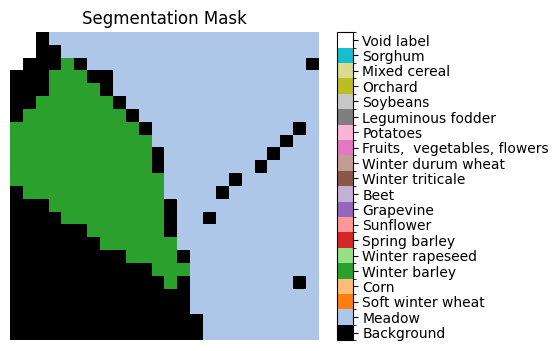

The image shows the presence of grapevine covering about 42900 m2, which accounts for a considerable fraction of the total agricultural area: 57600 m2.



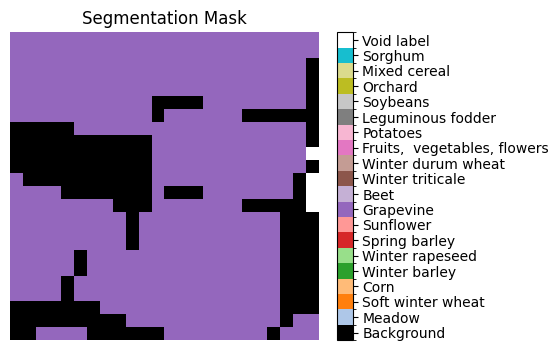

The image shows a cultivated area of soft winter wheat covering about 24700 m2, grapevine covering about 9700 m2, which represents a significant portion of the total cultivated land: 57600 m2.



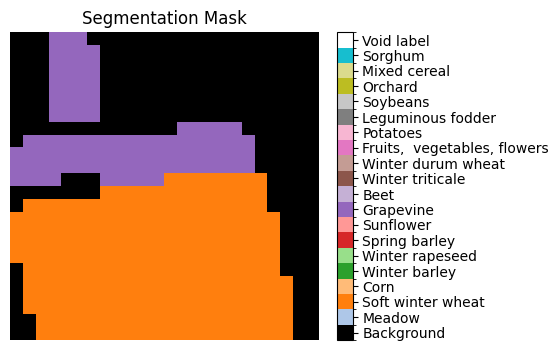

The image highlights the crop of meadow representing an area of around 27700 m2, which equals a meaningful portion of the cultivated land in the region: 57600 m2.



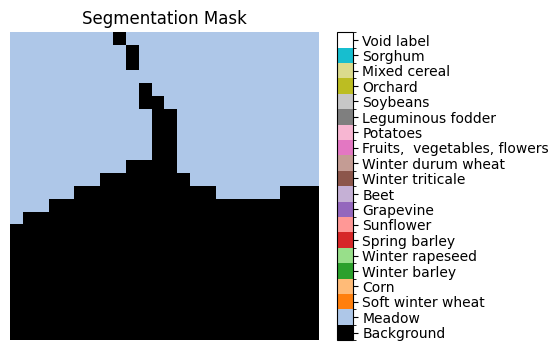

The crop of can be seen in the image meadow with a dimension close to 12000 m2, corn with a dimension close to 27700 m2, which covers a notable fraction of the total arable land: 57600 m2.



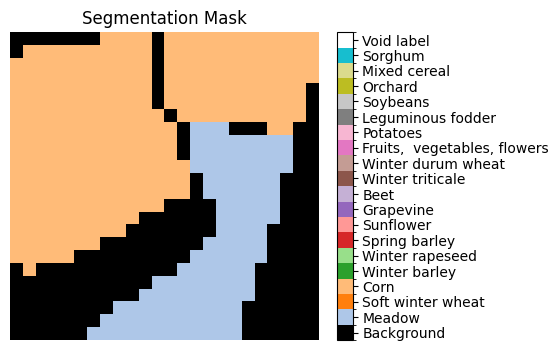

The image reveals a crop of meadow with an approximate area of 9900 m2, which represents a significant portion of the total cultivated land: 57600 m2.



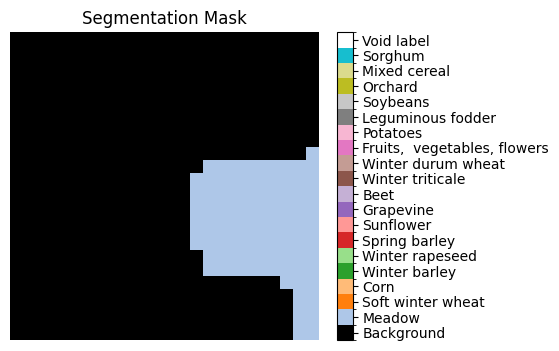

The crop appearing in the image is meadow with a coverage of approximately 33200 m2, winter rapeseed with a dimension close to 1200 m2, which equals a meaningful portion of the cultivated land in the region: 57600 m2.



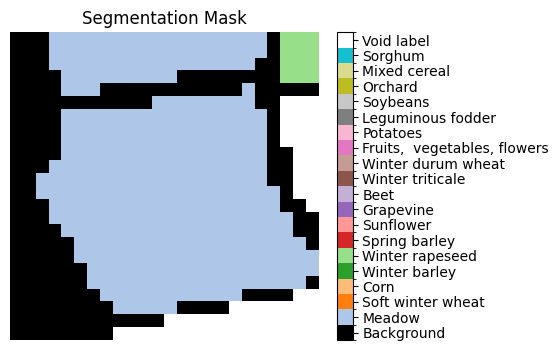

The image shows the presence of meadow with an estimated surface of 10900 m2, sunflower with an approximate area of 900 m2, grapevine covering about 14200 m2, fruits,  vegetables, flowers with a dimension close to 8800 m2, which represents a prominent portion of the region’s agricultural area: 57600 m2.



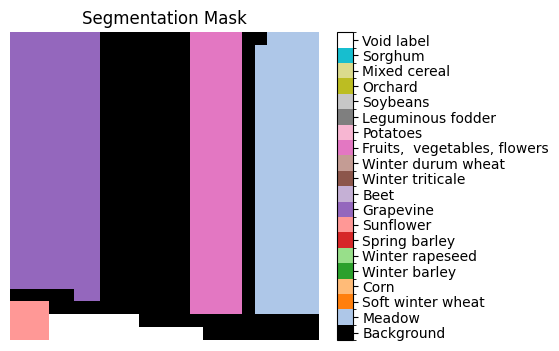

The image shows no signs of agricultural activity.


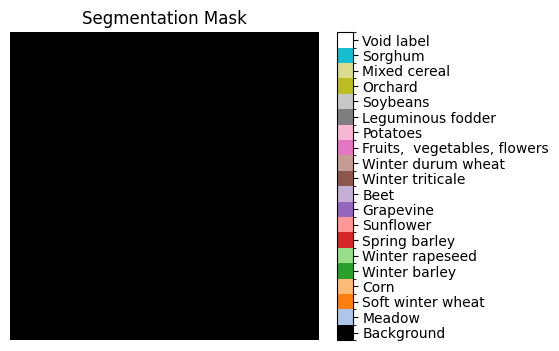

The image reveals a crop of meadow covering an area close to 44300 m2, which corresponds to a considerable share of the available agricultural area: 57600 m2.



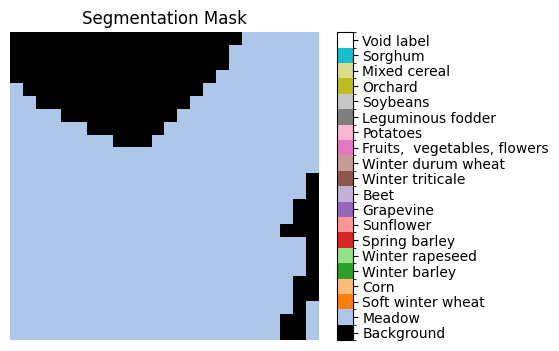

In [25]:
for i in range(10):
    print(mask_to_text(mask_arrays[i], label_names_en, language="en"))
    #print(mask_to_text(mask_arrays[i], label_names_en, language="en"))
    plot_seg_mask(mask_arrays[i], colormap, class_labels=label_names_en)